In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math

# Datos de diseño

In [63]:
# Requisitos y especificaciones
Vo = np.array([112,16])
Vd = 300
AL = 4700e-9    #H/n**2
Io = .5
Fsw = 100e3

In [54]:
# Relaciones de vueltas: Opción 1
N = np.array([25,28,4])
NK = N[1:]/N[0]

Dsw = 0.25
DK = Dsw/(1-Dsw)
N_total = N.sum()

print(N)
print(NK)
print(N_total)

[25 28  4]
[1.12 0.16]
57


In [44]:
# Relaciones de vueltas: Opción 2
N = np.array([25,14,2])
NK = N[1:]/N[0]

Dsw = 0.4
DK = Dsw/(1-Dsw)
N_total = N.sum()

print(N)
print(NK)
print(N_total)

[25 14  2]
[0.56 0.08]
41


In [45]:
# Tensiones:
V = Vd/N[0]*N*DK
V[0]= Vd
print(V)

[300. 112.  16.]


# VALORES DE INDUCTORES

In [57]:
#Escalamiento de vueltas
K = 1
N_L = N*K

L = AL*N_L**2
print(L)

[2.9375e-03 3.6848e-03 7.5200e-05]


In [58]:
K_dis = 0.05
L_dis = K_dis * L[0]
L_mag = (1-K_dis) * L[0]
print(L_mag, L_dis)

0.0027906249999999997 0.000146875


In [59]:
V_sw_off = V[0] + (V[1:]/NK).max() # Sumo Vd y las tensiones reflejadas por los secundarios.
print(V_sw_off)

400.0


In [64]:
dI1 = Vd/L[0]*Dsw/Fsw
Ix2 = Io / (1-Dsw)
Ix1 = Ix2*NK[0]

Im1 = Ix1*Dsw

Imax1 = Ix1 + dI1/2
print(Imax1)

0.8743262411347518


# CALCULO DE R_snubber y C_snubber

In [65]:
V_sw_max = 800


Snub_C = L_dis*Imax1**2/(V_sw_max**2-V_sw_off**2)

t_on = Dsw/Fsw

Snub_R = t_on/3/Snub_C
Snub_tau = Snub_R*Snub_C
print(Snub_C, Snub_R, Snub_tau)

2.339126280535855e-10 3562.5837744101214 8.333333333333334e-07


In [67]:
C = 220e-12
R = 3.9e3
tau = C*R
t_on = Dsw/Fsw
Tsw = 1/Fsw

V0 = V_sw_off

P = V0**2*C/(2*Tsw)*(1-math.e**(-2*t_on/tau))
print("P media: ",P,'W')
print("3tau: ",3*tau,"s")
print("ton: ",t_on,"s")

P media:  1.7548160710126595 W
3tau:  2.574e-06 s
ton:  2.5e-06 s


In [12]:
# Parámetros del núcleo
B_sat = 200e-3  #T
R = 1/AL
A = 280e-6      #mm**2
A_min = 351e-6 # mm**2

In [56]:
# Parámetros de Switching
F_SW = 100e3  # Hz
T_SW = 1/F_SW
skin = 66/np.sqrt(F_SW)

d_max = 2*skin
print(d_max)

0.41742065114222604


# Resolución de N1

In [14]:
from sympy import Symbol
from sympy.solvers import solve

In [15]:
I_rms = .34     #A
F_SW = 100e3
T_SW = 1/F_SW
D =Dsw

AL = 4700e-9    # H/n**2

B_sat = 200e-3  #T
R = 1/AL
A = 280e-6      #mm**2
A_min = 351e-6  # mm**2

In [16]:
a0 = 0.5*Vd*D*T_SW/A_min
a1 = B_sat
a2 = I_rms/R/A

In [17]:
N_i = Symbol('N1')
solve(a2*N_i**2-a1*N_i+a0)

[14.7837708664419, 20.2600338895030]

In [18]:
N1_range = [7,29]

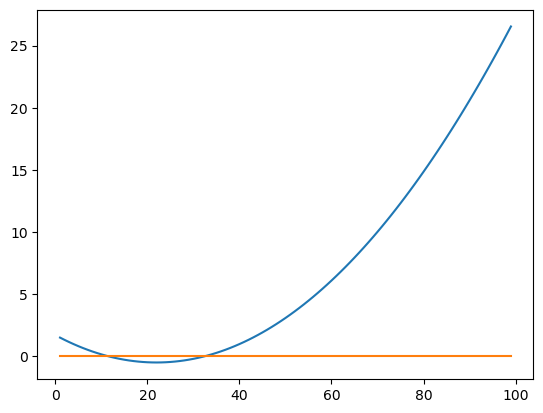

In [19]:
nn = np.arange(1,100)
zz = np.zeros(nn.size)
bb = nn**2*I_rms/R/A_min-nn*B_sat+0.5*Vd*D*T_SW/A_min

plt.plot(nn, bb, nn, zz)
plt.show()

# Corrientes de Carga

In [20]:
N1 = 25

In [21]:
I_1max = (B_sat-0.5*Vd*D*T_SW/N1/A_min)/(N1*AL/A)
I_1max

0.31365702855064564

In [22]:
s_max = skin**2*np.pi
print(s_max)    # area maxima de seccion de cada hilo de cobre
print(2*skin)   # diametro maximo del cobre conductor 

0.13684777599037137
0.41742065114222604


In [23]:
I_DC_max = 0.35
J = 4
I_DC_max/J/s_max

0.6393965803737761

# Valores Seleccionados

In [24]:
N_2vN_1 = np.array([0.48, 0.16])

In [25]:
N1 = 25
N2 = N1*N_2vN_1

I_1max = 0.34   # A
d_cu = 0.33
s_cu = (d_cu/2)**2*np.pi

J1 = I_1max/s_cu

In [26]:
I_2max = I_1max*N1/N2
print(I_2max)

J2 = I_2max/s_cu
print(J2)

n2_cu = J2/4
print(n2_cu)

[0.70833333 2.125     ]
[ 8.28170809 24.84512427]
[2.07042702 6.21128107]


# Considerando el secundario de 16 V con solamente el límite del pwm

In [27]:
I_pwm = 0.5
J = I_pwm/s_cu
print(J)

n_pwm = I_pwm/4/s_cu
print(n_pwm)

5.845911591988808
1.461477897997202
